In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Image restoration
Image acquisition is rarely perfect,  physics or external condition may deform the image being acquired, here are some example of typicall problems:



## Deformation model
The original image is $f(x,y)$ undergoes a deformation, given by $H$, and an additive noise $\eta(x,y)$ the acquired image is $g(x,y)$. 

The restoration problem can be stated as follow:

how to recover a good approximation of $f(x,y)$ from $g(x,y)$?


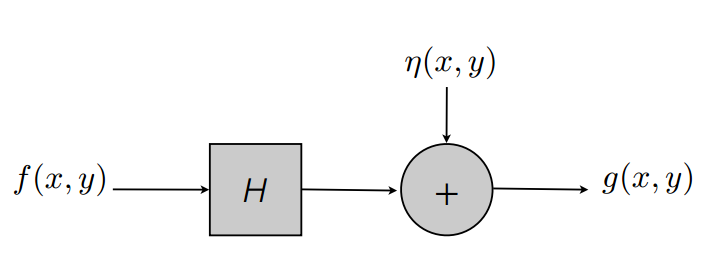

In [2]:
Image('http://homepages.ulb.ac.be/~odebeir/data/restauration.png')

Some examples:

$$g(x,y) = H[f(x,y)] + \eta(x,y)$$

$H$ properties:

* linear

$$ H[k_1 f_1(x,y) + k_2 f_2(x,y)] = k_1 H[f_1(x,y)] + k_2 H[f_2(x,y)]$$

* additive

$$ H[f_1(x,y) + f_2(x,y)] = H[f_1(x,y)] + H[f_2(x,y)]$$

* homogeneous

$$ H[k_1 f_1(x,y)] = k_1 H[f_1(x,y)]$$

* spatially invariant

$$ H[f(x-\alpha,y-\beta)] = g(x-\alpha,y-\beta)$$

## Point Spread Function (PSF)
We can rewrite $f(x,y)$ as a sum of Dirac function.

$$f(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(\alpha,\beta) \, \delta(x-\alpha,y-\beta) \, d\alpha \, d\beta$$

if there is no addiditive noise:

$$\begin{eqnarray}g(x,y) &=& H[f(x,y)] \\ \\
&=& H \big[ \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(\alpha,\beta) \, \delta(x-\alpha,y-\beta) \, d\alpha \, d\beta \, \big] 
\end{eqnarray}$$

by linearity property:

$$g(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} H \big[f(\alpha,\beta) \, \delta(x-\alpha,y-\beta)\big] \, d\alpha \, d\beta $$

$f(\alpha,\beta)$ is independant of $x$ and $y$:

$$g(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(\alpha,\beta)\, H \big[ \, \delta(x-\alpha,y-\beta)\big] \, d\alpha \, d\beta $$

the impulse response of $H$, also known as point spread function (PSF),  is:

$$h(x,\alpha,y,\beta) = H\big[ \delta(x-\alpha,y-\beta)\big]$$

after substitution we have:

$$g(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(\alpha,\beta)\, h(x,\alpha,y,\beta) \, d\alpha \, d\beta $$

this expression means that, if the response H of an impulse is known, the response of any input $f(\alpha,\beta)$ is known.

if $h$ is spatially invariant (see above):

$$g(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(\alpha,\beta)\, h(x-\alpha,y-\beta) \, d\alpha \, d\beta$$

by adding the noise:

$$g(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(\alpha,\beta)\, h(x-\alpha,y-\beta) \, d\alpha \, d\beta + \eta(x,y)$$

> see also:
* [DIP](../00-Preface/06-References.ipynb#[DIP]) p254

## Restoration
### inverse filtering

If noise is negligeable and PSF is known (in the Fourier domain):

$$\begin{eqnarray}
\hat F(u,v) &=& \frac{G(u,v)}{H(u,v)}\\
\hat f(x,y) &=& \mathcal F^{-1} \big[ \hat F(u,v) \big]\\
            &=& \mathcal F^{-1} \big[\frac{G(u,v)}{H(u,v)}\big]
\end{eqnarray}
$$

else:

$$\hat F(u,v) = F(u,v) + \frac{N(u,v)}{H(u,v)}$$

and noise is increasing when $H$ is low, restoration is limited where $H$ is big.

if define a restoration transform $M(u,v)$ as:

$$\hat F(u,v) = (G(u,v)+N(u,v)) M(u,v)$$

one can use:

$$M(u,v) = \begin{cases}1/H(u,v),\, \qquad & u^2+v^2 \le& w_0 ^2\\
1, \qquad & u^2+v^2 >& w_0 ^2
\end{cases}
$$

with $w_0$ being a distance to the origin in the Fourier space.


> see also:
* [DPP](../00-Preface/06-References.ipynb#[DPP]) p276

### Wiener filtering

To avoid arbitrary setting of a parameter for theinverse transform such as $w_0$, one can use the Wiener approach wich consists in minimizing by least square some error function.

Without going into the details, the restoration transform is:

$$M(u,v) = \frac{H^*(u,v)}{|H(u,v)|^2+\frac{S_{\nu \nu}(u,v)}{S_{gg}(u,v)}}$$

where $H^*(u,v)$ is the complex conjugate of $H(u,v)$,

$S_{\nu \nu}(u,v)$ is the spectral density of the noise and

$S_{gg}(u,v)$ is the spectral density of the degraded image.

> see also:
* [IPAMV](../00-Preface/06-References.ipynb#[IPAMV]) p107

### Blind deconvolution

If PSF in unknown, is has to be estimated. This is called blind deconvolution.



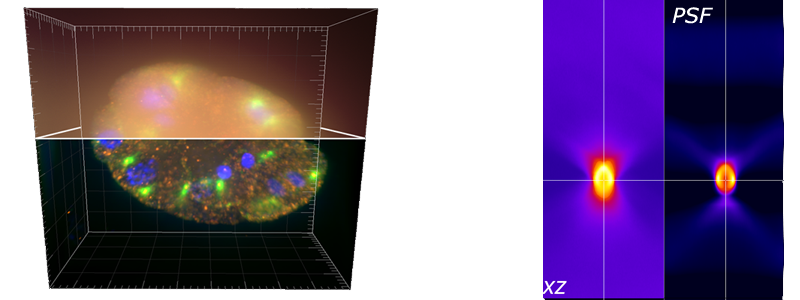

In [3]:
Image('http://bigwww.epfl.ch/algorithms/deconvolutionlab/meta/splash.png')

<sup>[image source](http://bigwww.epfl.ch/algorithms/deconvolutionlab/)